<a href="https://colab.research.google.com/github/gvtsch/gvtsch.github.io/blob/main/AE_Tech_Talk_MNIST_Beitrag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wie kann man einem Computer beibringen, eine Ziffer zu erkennen? Oder Schriftzeichen? Handynummern? Schilder?
## Oder: Wie funktionieren Neuronale Netze?  




In diesem Beitrag versuche ich, euch zu zeigen oder näher zu bringen, wie ein künstliches Neuronales Netz funktioniert. Weil das Thema sehr umfangreich ist, habe ich einen roten Faden einbauen wollen. An Hand eines Beispiels, dem roten Faden, hangel ich mich durch das Thema.

Wir werden das **Hallo Welt!** des maschinellen Lernens betrachten: Der **MNIST** Datensatz.

### **Der MNIST Datensatz**

Der MNIST-Datensatz ist eine bekannte Sammlung von handgeschriebenen Ziffern, die für die Entwicklung von Algorithmen zur Erkennung von Schriftzeichen und zur Bildverarbeitung von großer Bedeutung ist. In diesem Kapitel werde ich den MNIST-Datensatz genauer untersuchen und zeigen, wie man neuronale Netze trainieren kann, um handgeschriebene Ziffern zu erkennen.

Das Alles werde ich *live* mit Python-Code begleiten.
Am Ende werde ich euch eine kleine Python-Applikation zeigen, in der man mit der Maus Ziffern schreiben und die Klassifizierung durch das Neuronale Netz lesen kann.

Kurze Anmerkung zum Python-Code. Das geht alles wesentlich eleganter und effizienter. Allerdings glaube ich, dass der folgende Code für Nicht-Programmierer einfacher zu verstehen ist.



Als erstes tätigen wir ein paar Imports. In Python ermöglichen die Imports, auf bereits vorhandene Codebibliotheken zuzugreifen, anstatt alles von Grund auf neu schreiben zu müssen. Dies spart Zeit und ermöglicht es mir, auf bewährte und getestete Funktionen zurückzugreifen.

In [1]:
# Necessary Imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import random
import numpy as np



Dann setzen wir ein paar Seeds. Seeds werden im Maschinenlernen verwendet, um die Zufälligkeit in den Algorithmen zu kontrollieren und reproduzierbare Ergebnisse zu erzielen. Es ist ratsam, verschiedene Seeds auszuprobieren, um die Robustheit des Modells zu gewährleisten.

In [2]:
# Set seeds to make results reproduceable
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In Keras ist der MNIST-Datensatz, der aus handgeschriebenen Ziffern besteht, bereits abgelegt. Es gibt eine Load-Funktion in Keras, mit der Sie diesen Datensatz einfach in Ihr Modell laden können. Davon mache ich hier Nutzen.

In [3]:
# Load Dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Es folgt ein Codeblock, der die ersten 20 Bilder des Datensatzes darstellt.

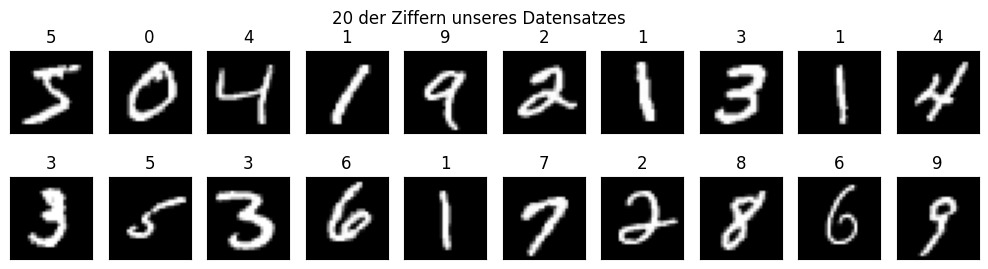

In [4]:
# Plot some (20) of the digits
fig = plt.figure(figsize=(12.5, 3))
for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  ax.imshow(x_train[idx], cmap="gray")
  ax.set_title(str(y_train[idx]))

fig.suptitle("20 der Ziffern unseres Datensatzes")
plt.show()

#### **Überblick über den MNIST Datensatz**

Der MNIST-Datensatz besteht aus insgesamt **70.000** Bildern von handgeschriebenen Ziffern. Davon sind **60.000** Bilder für das Training und **10.000** Bilder für das Testen vorgesehen. Die Bilder sind **schwarz-weiß** und haben eine Größe von **28x28** Pixeln.

Der Datensatz wurde in den 1990er Jahren von Yann LeCun, Corinna Cortes und Christopher J.C. Burges am Courant Institute of Mathematical Sciences der New York University erstellt. Er wurde entwickelt, um Algorithmen zur Erkennung von handgeschriebenen Ziffern zu trainieren und zu testen.

Die handgeschriebenen Ziffern im Datensatz stammen von einer Vielzahl von Personen und wurden auf Standardformularen geschrieben. Die Ziffern sind in einer zufälligen Reihenfolge angeordnet und besitzen keine besonderen Merkmale oder Muster, die die Erkennung beeinflussen könnten.

Der Datensatz ist ein Standardbenchmark-Datensatz und wird häufig verwendet, um die Leistungsfähigkeit von Algorithmen im Bereich des maschinellen Lernens zu vergleichen. Beim MNIST-Datensatz handelt es sich um ein einfaches und leicht verfügbares Datenset, weshalb es sehr häufig in Tutorials, Schulungen oder ähnlichem genutzt wird. Das **Hallo Welt!** des maschinellen Lernens eben.

Als erstes schauen wir uns ein einzelnes Bild genauer an. Dazu wählen wir eines zufällig aus und plotten es. Zum einen das Bild als solches, zum anderen wie es im Speicher abgelegt ist und wie Computer es nutzen, als Zahlen.

Label des zufällig gewählten Bildes: 4


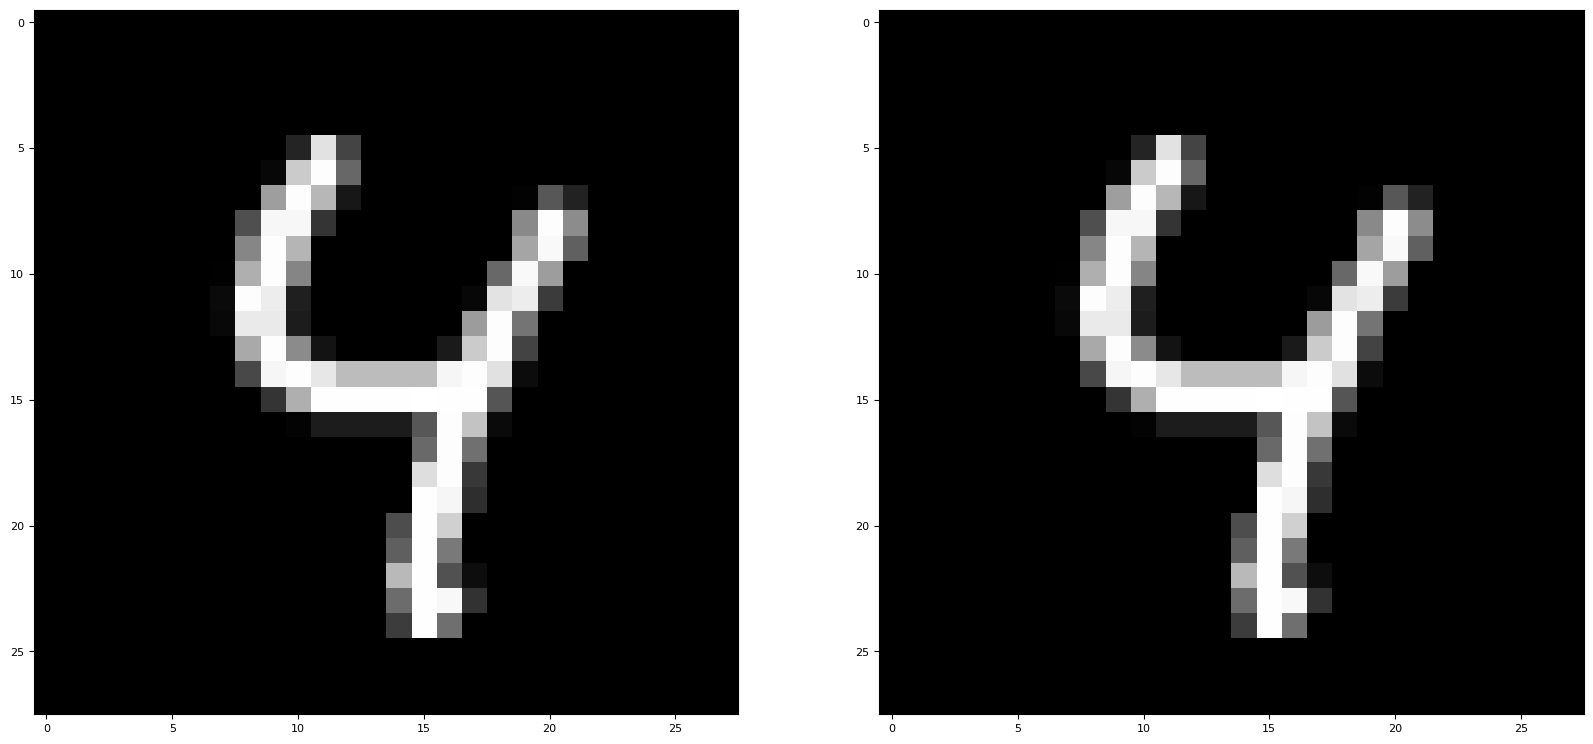

In [5]:
# Show a random image
plt.rcParams.update({'font.size':8})

rnd = random.randint(0, random.randint(0, len(x_train)))
img = x_train[rnd]
ground_truth = y_train[rnd]

plt.figure(figsize = (20, 10))
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")

fig = plt.subplot(1,2,2)
fig.imshow(img, cmap="gray")
width, heigth = img.shape
thrs = img.max()/2.5
for x in range(width):
  for y in range(heigth):
    val = round(img[x][y], 2) if img[x][y] != 0 else 0
    ax.annotate(str(val), xy = (y, x),
                horizontalalignment = "center",
                verticalalignment = "center",
                color = "white" if img[x][y] < thrs else "black")

print(f"Label des zufällig gewählten Bildes: {ground_truth}")

Das zufällige Bild des Datensatzes hat die erwähnten $28x28$ Pixel und ist in Graustufen abgelegt. Als Bild ist es links dargestellt.
Die einzelnen Werte der Graustufen, also die Zahlen die ein jedes Pixel repräsentieren, sind in der rechten Ausgabe dargestellt. Es handelt sich dabei ursprünglich um Werte zwischen $0$ und $255$, also $8$ Bit je Pixel.  Der Wert gibt an, wie hell dieses Pixel ist.

Diese Zahlenwerte sind jene, die in das noch zu beschreibende Input-Layer eingespielt werden.

#### **Feature Maps**

Während das obige Bild des MNIST Datensatzes eine Feature Map hat, die Graustufenwerte, sieht das bei farbigen Bildern anders aus. Farbige Bilder haben für jeden Farbkanal eine eigene Feature Map: Rot, Grün, Blau. Gebräuchlich sind 8 Bit pro Kanal, was in Summe $16.777.216$ mögliche Farben ergibt. Bei der Erkennung von Ziffern können wir natürlich auf die Farbkanäle verzichten. Es genügen Grauwertstufen.

<figure>
  <img src="https://miro.medium.com/v2/resize:fit:720/format:webp/0*xGj2NQwOpsLpx1Ji.png", width="600">
  <figcaption>Die drei Feature Maps eines RGB-Bildes.</figcaption>
</figure>



### **Das Neuronale Netz**

Zurück zu unserem Beispiel: Wir haben also $28 * 28 = 784$ Pixel mit jeweils einem Wert. Und diese 784 Pixel gilt es zu analysieren. Unser Gehirn hat gelernt diese Pixel so miteinander zu verknüpfen, dass wir die Zahl ohne weiteres erkennen. Dem Neuronalen Netz müssen wir das noch beibringen.

Wir nehmen also diese $784$ Pixel als Eingang für unser Neuronales Netz. Als Ausgang geht aus der Aufgabenstellung hervor, dass wir $10$ Ausgänge, die Ziffern $0$ bis $9$, benötigen.
Die Eingänge oder Eingangs-Ebene bezeichnen wir als Input-Layer, die Ausgänge als Output-Layer. Alles dazwischen sind sogenannte Hidden Layer. Hier wird bereits klar, dass unser Neuronales Netz sinnvoll nur für diese Aufgabe eingesetzt werden kann.

Die Eingangsmatrix von $28 * 28$ Pixeln transformieren wir zur einfacheren Handhabung zu einem Tensor der Größe $784$. Wir haben dann $784$ in Reihe angeordnete Pixel bzw. Eingänge, die ihrerseits mit jedem Neuron im folgenden Layer verbunden sind. Jedes einzelne dieser Neuronen ist widerum mit jedem Neuron des folgenden Layers verbunden, bis hin zum Output-Layer. Bei dieser Architektur handelt es sich um das sogenannte **Multilayer Perceptron**.
Es gibt auch andere Architekturen, bei denen das so nicht der Fall ist, aber dazu später mehr.

<figure>
  <img src="https://tikz.net/wp-content/uploads/2021/12/neural_networks-002.png", alt="", width="500">
  <figcaption>Feedforward Netzwerk bzw. Multilayer Perzeptron. <a href="https://tikz.net/wp-content/uploads/2021/12/neural_networks-002.png">Bildquelle</a></figcaption>
</figure>

Der Begriff **Neuron** ist nun so häufig gefallen, dass wir es genauer betrachten sollten.

##### **Das Neuron**

Das Neuron ist ein einfaches künstliches neuronales Netzwerk (KNN oder ANN — artificial neural network), das in den frühen Tagen der künstlichen Intelligenz (KI) entwickelt wurde. Es ist ein grundlegendes Konzept für maschinelles Lernen und wird oft als Einführung in das Thema der tiefen neuronalen Netze (DNNs) verwendet.

<figure>
  <img src="https://tikz.net/wp-content/uploads/2023/12/neural_networks-009.png" alt="Ein Neuron mit Eingabevektor, Bias, Aktivierungsfunktion und Ausgabe", width="700">
  <figcaption>Ein Neuron mit Eingabevektor, Bias, Aktivierungsfunktion und Ausgabe.  <a href="https://tikz.net/wp-content/uploads/2023/12/neural_networks-009.png">Bildquelle</a>
</figure>

Ein Neuron besteht aus einem Eingabevektor $a_i$, einem Gewichtungsvektor $w_i$, einem Offset oder Bias $b$ und einer Aktivierungsfunktion $\sigma$. Jedem Eingabewert wird ein Gewicht zugewiesen, welches den Einfluss des jeweiligen Werts auf die Ausgabe des Neurons bestimmt. Die Summe aller gewichteten Eingabewerte wird dann durch die Aktivierungsfunktion übertragen, die entscheidet, ob und wie das Neuron „aktiviert“ wird oder nicht. Eine detaillierte Betrachtung von verschiedenen Aktivierungsfunktionen ist ebenfalls in diesem Artikel enthalten. Eine kurze Übersicht findest du in diesem Bild. Die Abszisse repräsentiert den Wert, der in die Aktivierungsfunktion einfließt und die Ordinate die entsprechende Aktivierung.

<figure>
  <img src="https://www.researchgate.net/profile/Max-Pritzkoleit/publication/335490710/figure/fig1/AS:797522956124160@1567155698415/Abbildung-4-Gaengige-Aktivierungsfunktionen-f-Akt-fuer-die-Verwendung-in-KNN.png" alt="Drei Aktivierungsfunktionen: Sigmoid, tanh und ReLU", width="500">
  <figcaption>Drei der gängigsten Aktivierungsfunktionen: Sigmoid, tanh und ReLU</figcaption>
</figure>

Das Neuron kann für eine Vielzahl von Aufgaben trainiert werden, einschließlich Klassifikationen und Regressionen. Im Falle einer Klassifikation wird das Neuron trainiert, um eine Eingabe in eine von mehreren vordefinierten Kategorien einzuordnen. Im Falle einer Regression wird das Neuron trainiert, um eine kontinuierliche Ausgabe auf der Grundlage einer Eingabe vorherzusagen.

Das Training eines Neurons besteht im Wesentlichen darin, die Gewichte anzupassen, um die Vorhersagegenauigkeit des Modells zu verbessern. Dies geschieht durch Verwendung eines Optimierungsalgorithmus wie zum Beispiel das Gradientenabstiegsverfahren, welches während der sogenannten Backpropagation die Gewichte auf der Grundlage der Fehler, die das Neuron bei der Vorhersage macht, aktualisiert.

Von diesen Neuronen haben wir also $784$ im Eingangslayer und $10$ im Outputlayer. Für ein besseres Ergebnis oder schnelleres Training werden die Werte der Eingänge noch skaliert. Nicht allgemeingültige Gründe dafür sind:

* **Bessere Konvergenz**: Durch das Skalieren der Eingänge auf einen ähnlichen Wertebereich kann die Konvergenz des Trainingsprozesses verbessert werden. Wenn die Eingänge stark unterschiedliche Wertebereiche haben, kann dies dazu führen, dass einige Gewichte im Netzwerk schneller aktualisiert werden als andere. Dies kann zu einer langsameren Konvergenz oder sogar zu einem steckenbleibenden Training führen. Durch die Skalierung der Eingänge können diese Probleme reduziert werden.

* **Vermeidung numerischer Instabilität**: In neuronalen Netzen werden oft mathematische Operationen wie die Berechnung von Aktivierungsfunktionen oder die Gewichtsaktualisierung durchgeführt. Wenn die Eingänge große Werte haben, können diese Operationen zu numerischer Instabilität führen, z.B. durch Überlauf oder Unterlauf. Durch die Skalierung der Eingänge auf einen kleineren Wertebereich können solche Probleme vermieden werden.

* **Bessere Interpretierbarkeit**: Skalierte Eingänge können auch zu einer besseren Interpretierbarkeit der Ergebnisse führen. Wenn die Eingänge auf einen bestimmten Wertebereich skaliert sind, können die Gewichte im Netzwerk direkt mit der Bedeutung der Eingabevariablen in Beziehung gesetzt werden. Dies kann helfen, die Auswirkungen der Eingaben auf die Vorhersagen des Modells besser zu verstehen.

Der Eingangsvektor sieht dann wie folgt aus:

In [6]:
print(f"Form von x_train vor dem Reshaping: {x_train.shape}\n"
      f"Maximaler Wert eines Eintrages: {x_train[rnd].max()}\n"
      f"Form eines einzelnen Bildes/Eingabevektors: {x_train[rnd].shape}")

x_train = x_train.reshape((-1, 28 * 28)).astype("float32") / 255
x_test = x_test.reshape((-1, 28 * 28)).astype("float32") / 255

print(f"Form der Daten nach dem Reshaping: {x_train.shape}\n"
      f"Maximaler Wert eines Eintrages: {x_train[rnd].max()}\n")

Form von x_train vor dem Reshaping: (60000, 28, 28)
Maximaler Wert eines Eintrages: 255
Form eines einzelnen Bildes/Eingabevektors: (28, 28)
Form der Daten nach dem Reshaping: (60000, 784)
Maximaler Wert eines Eintrages: 1.0



##### **One-Hot-Kodierung**

Als nächstes führe ich eine **One-Hot-Kodierung** durch. Die One-Hot-Kodierung ist eine Technik zur Repräsentation von Kategorien als binäre Vektoren. Jede Kategorie erhält einen Vektor, wobei eine Position für die Kategorie steht und alle anderen Positionen Nullen enthalten. Diese Kodierung wird häufig in der Machine-Learning-Modellierung verwendet. Bei unseren handgeschriebenen Ziffern würde jeder Ziffer eine eindeutige Kategorie zugewiesen werden. Eine $0$ könnte beispielsweise als $[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]$ kodiert werden, während eine $1$ als $[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]$ kodiert werden würde, usw.

Gerade bei Klassifizierungsproplemen - wie hier beim MNIST Datensatz - sollten die Ausgabe-Variablen in eine geeignete Form gebracht werden, um sie im Modell verwenden zu können. Durch die Verwendung von One-Hot-Encoding können die Ausgabevariablen effizienter mit dem Modell verwendet werden, da sie als numerische Werte dargestellt werden können. Dies erleichtert die Berechnungen und das Training des Modells.

In [7]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
print(f"One-hot-kodiertes Label: \n{y_train[rnd]}\n"
      f"Ground Truth / Label: {ground_truth}")

One-hot-kodiertes Label: 
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Ground Truth / Label: 4


#### **Aufbau des neuronalen Netzes**

Kommen wir nun zum eigentlichen Neuronalen Netz. Beginnen wir mit der Implementierung.

Als erstes definieren wir einen sogenannten Early Stopping Callback. Early Stopping ist eine Methode im maschinellen Lernen, bei der das Training eines Modells vorzeitig beendet wird, um Überanpassung zu vermeiden, basierend auf der Beobachtung der Validierungsfehler während jeder Epoche.

In [8]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)

Als nächstes folgt das Model. Ich setze hier ein sequentielles Model ein.
Ein Sequential Model in TensorFlow ist eine lineare Stapelung von Schichten oder (hidden) Layern, die nacheinander ausgeführt werden. Es ermöglicht den Aufbau und das Training von neuronalen Netzwerken für verschiedene Aufgaben im maschinellen Lernen, indem verschiedene Schichttypen verwendet werden.

Definieren wir die Größen der einzelnen Layer. Wir geben die Anzahl der gewünschten Neuronen an.

In [9]:
input_layer_size = 28 * 28
first_layer_size = 256
second_layer_size = 128
output_layer_size = 10

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(first_layer_size, activation="relu", input_shape=(input_layer_size,)), # Inputlayer und erstes hidden layer
    tf.keras.layers.Dense(second_layer_size, activation="relu"), # zweites hidden layer
    tf.keras.layers.Dense(output_layer_size, activation="softmax") # output-layer
])

Das Model muss dann kompiliert werden. Hier kann man verschiedenste Parameter übergeben. Ich beschränke mich hier auf den Optimierer, den Loss und die Metriken. In aller Kürze eine Beschreibung:
* **Optimierer**: Ein Optimierer ist ein Algorithmus, der die Gewichte eines neuronalen Netzwerks anpasst, um den Fehler zu minimieren.
* **Loss**: Der Loss (Verlust) ist eine Funktion, die den Fehler zwischen den Vorhersagen des Modells und den tatsächlichen Werten misst.
* **Metrics**: Metrics (Metriken) sind Maßstäbe, um die Leistung eines Modells zu bewerten, z.B. Genauigkeit oder F1-Score.

Für gewöhnlich übergibt auch eine Lernrate, die genutzt wird, um die Gewichte während der Backpropagation anzupassen. Der verwendete Adam-Optimierer macht diesen Schritt überflüssig:
* Der Adam-Optimierer ist ein Optimierungsalgorithmus, der eine adaptive Lernrate verwendet. Im Gegensatz zu anderen Optimierern wie dem Gradientenabstiegsverfahren, bei dem eine feste Lernrate angegeben werden muss, passt der Adam-Optimierer die Lernrate automatisch an die Daten an. Er berechnet und aktualisiert die Lernrate basierend auf den Momenten der Gradienten. Dadurch entfällt die Notwendigkeit, dem Adam-Optimierer eine feste Lernrate zu übergeben.

Eine genauere Beschreibung habe ich im weiteren Verlauf dieses Beitrages geschrieben.

In [11]:
# Kompilieren des Modells
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Und nun lassen wir uns ein paar Informationen über unser neuronales Netz ausgeben.

In [12]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
None


Wir haben also rund $200000$ Parameter, die während des Trainings angepasst werden müssen. Hierbei handelt es sich keineswegs um ein besonders großes Netz, welche gerne auch mal Parameter im $9$-stelligen Bereich haben, aber dennoch um zu viele, um das Netz (mehrfach) von Hand anzupassen und hoffentlich um genug Parameter, um die Ziffern erkennen zu können.

In [13]:
# Training des Modells
history = model.fit(x_train, y_train, epochs=50, batch_size=128, callbacks=[callback], validation_split=0.2, verbose=0)

Im obigen Schritt wird nun das Training durchgeführt. Auch hier werden wieder einige Parameter übergeben:
* **Epochen**: Eine Epoche ist eine Iteration über den gesamten Trainingsdatensatz während des Trainingsprozesses eines Modells. Durch das Durchlaufen mehrerer Epochen kann das Modell mehrmals auf den gesamten Trainingsdatensatz zugreifen und seine Gewichte entsprechend anpassen, um eine bessere Leistung zu erzielen.
* **Batch Size**: Die Batch Size gibt an, wie viele Trainingsbeispiele gleichzeitig in einem Schritt verarbeitet werden. Die Batch Size beeinflusst, wie viele Trainingsbeispiele gleichzeitig verarbeitet werden. Eine größere Batch Size kann das Training beschleunigen, während eine kleinere Batch Size eine genauere Aktualisierung der Gewichte ermöglichen kann.
* **Validation-Split**: Während des Trainings wird die Validierungs-Trainings-Aufteilung verwendet, um den Fortschritt des Modells zu überwachen und Überanpassung zu vermeiden. Ein Teil der Trainingsdaten wird als Validierungsdaten abgetrennt und separat verwendet, um die Leistung des Modells auf unbekannten Daten zu bewerten und Hyperparameter anzupassen.

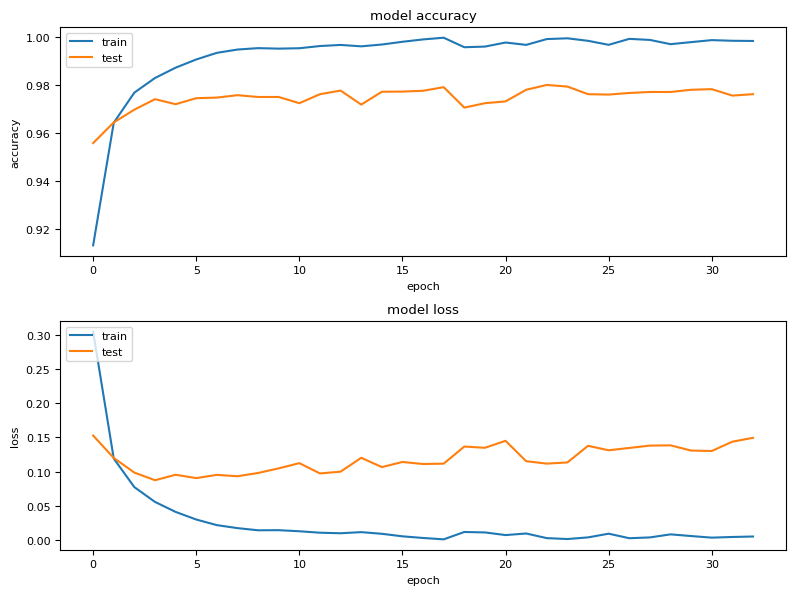

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Plot 1
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='upper left')

# Plot 2
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='upper left')

plt.tight_layout()
plt.show()

Im obigen Plot sind nun Genauigkeit und Loss von Training und Validierung nach jeder Epoche dargestellt. An diesen Kurven kann man die generelle Performance ablesen. Aber auch speziellere Infos lassen sich ableiten. Ist z.B. die Genauigkeit des Trainings sehr gut, die der Validierung hingegen nicht, ist das Model vermutlich overfitted. Sind beide Genauigkeiten schlecht, ist es underfitted. Mehr dazu in Kürze.

Wenn wir der Meinung sind das Training unseres Netzes war ausreichend, können wir die Performance an bisher nicht gesehenem Material testen.

In [15]:
# Bewertung des Modells
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1239 - accuracy: 0.9786
Test accuracy: 0.978600025177002


Wir erhalten mit obigem Neuronalen Netz eine Genauigkeit von $97.8\% $. Zum Vergleich erreichen die besten Modelle Genauigkeiten von über $99.8\% $.

Ein etwas anderer Vergleich, um es nach unten abzugrenzen. Angenommen die Ziffern kämen im Datensatz gleichverteilt vor, jede Ziffer also mit der Wahrscheinlichkeit von $10\%$, und mein Model würde bei jeder Ziffer sagen, es ist nicht die $5$, dann hätte das Modell in $90\%$ der Fälle recht. Natürlich hinkt dieser Vergleich ein wenig.


Nun hat das obige Modell evtl. ein Overfitting-Problem, weil es während des Trainings fast $100\%$ Genauigkeit erreicht, die Genauigkeit in der Validierung da aber nicht mithalten kann. Daher versuche ich nun das Ergebnis durch ein sogenanntes Dropout-Layer zu verbessern.

##### **Underfitting, Overfitting und Dropout**
Underfitting und Overfitting sind Probleme, die beim Training von Machine-Learning-Modellen auftreten können. Underfitting tritt auf, wenn das Modell nicht in der Lage ist, die Trainingsdaten gut zu erfassen, während Overfitting auftritt, wenn das Modell zu stark an die Trainingsdaten angepasst ist und nicht gut auf neuen Daten generalisiert.

<figure>
  <img src="https://tikz.net/janosh/dropout.png", width="700">
  <figcaption>Dropout in verschiedenen Hidden Layern. <a href="https://tikz.net/dropout/">Bildquelle</a>
</figure>


Um Overfitting zu verhindern, gibt es verschiedenste Techniken. Eine davon ist der sogenannte Dropout.
Während des Trainings werden zufällig Neuronen deaktiviert, indem ihre Ausgaben
bzw. Gewichte auf Null gesetzt werden. Dadurch wird Redundanz reduziert und das Modell wird robuster. Dropout hilft, die Generalisierungsfähigkeit des Modells zu verbessern und verbessert die Leistung auf neuen Daten.

Implementiert ist es recht schnell. Ich kann das Sequential Model einfach um ein Layer erweitern und neu kompilieren. Ich gebe dem Layer mit, dass es $20\%$ der Neuronen droppen soll. Das passiert bei jedem Trainingdurchlauf zufällig.
Anschließend starten wer das Training mit dem veränderten Modell noch mal neu.

In [16]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(first_layer_size, activation="relu", input_shape=(input_layer_size,)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(second_layer_size, activation="relu"),
    tf.keras.layers.Dense(output_layer_size, activation="softmax")
])

In [17]:
# Kompilieren des Modells
model2.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
# Training des Modells
history = model2.fit(x_train, y_train, epochs=50, batch_size=128, callbacks=[callback], validation_split=0.2, verbose=0)

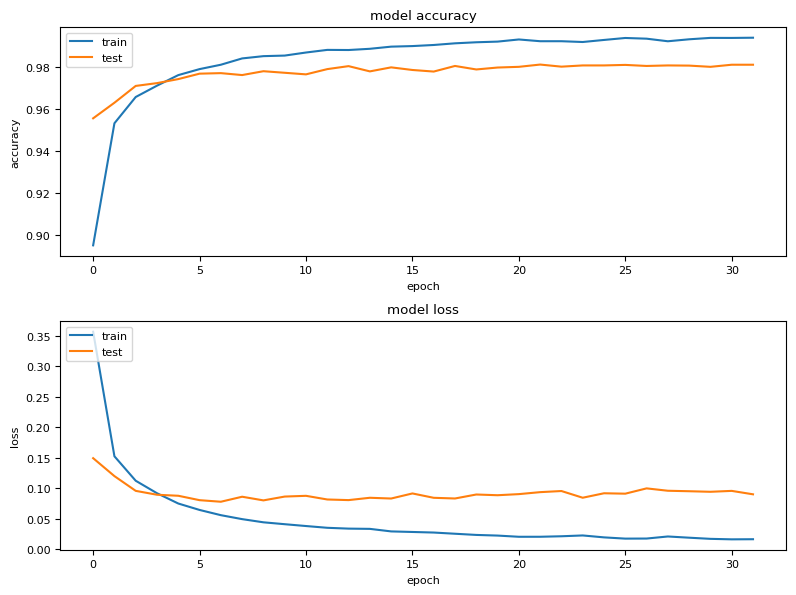

In [20]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Plot 1
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='upper left')

# Plot 2
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='upper left')

plt.tight_layout()
plt.show()

In [21]:
# Bewertung des Modells
test_loss, test_acc = model2.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0870 - accuracy: 0.9811
Test accuracy: 0.9811000227928162


Verglichen mit unserem vorigen Ergebnis ($97.8\$$) haben wir eine kleine Verbesserung erreicht: $98.1\%$. Ich kann den Vergleich hier anstellen, weil ich zu Beginn die Seeds, welche zum Erzeugen der Pseudozufallszahlen herangezogen werden, gesetzt habe. Das soll sicherstellen, dass alles, was mit Randomisierung zu tun hat, reproduzierbar ist. 

Als nächstes betrachten wir in der Fehlermatrix, wo das Modell noch bessere Vohersagen machen könnte bzw. wo es evtl noch Schwierigkeiten hat.

### **Fehlermatrix**

Die Fehlermatrix (auch als Confusion matrix bekannt) ist eine Tabelle, die die Leistung eines Klassifikationsmodells darstellt. Sie zeigt die Anzahl der korrekt und inkorrekt klassifizierten Beispiele für jede Klasse.

Die Confusion Matrix besteht aus vier Hauptkomponenten: True Positives (TP), True Negatives (TN), False Positives (FP) und False Negatives (FN). TP sind die korrekt klassifizierten positiven Beispiele, TN sind die korrekt klassifizierten negativen Beispiele, FP sind die fälschlicherweise als positiv klassifizierten Beispiele und FN sind die fälschlicherweise als negativ klassifizierten Beispiele.

Die Confusion Matrix ermöglicht es uns, verschiedene Leistungsmetriken abzuleiten, wie z.B. Genauigkeit, Präzision, Recall und F1-Score. Sie gibt uns auch Einblicke in die Art der Fehler, die das Modell macht, und kann uns helfen, die Leistung des Modells zu verbessern, indem wir die Fehler analysieren und entsprechende Anpassungen vornehmen.

Die Confusion Matrix ist ein wichtiges Werkzeug in der Evaluierung von Klassifikationsmodellen und hilft uns, die Stärken und Schwächen des Modells zu verstehen und zu interpretieren.

Ich möchte sie hier nutzen, um abzuschätzen, wo das Model falsche Vorhersagen macht. Dazu müssen wir das Model erst die Prädiktionen machen lassen.

In [22]:
y_pred = model2.predict(x_test)
print(f"y_pred shape: {y_pred.shape}\n"
  f"y_test shape: {y_test.shape}")


313/313 [==============================] - 1s 2ms/step
y_pred shape: (10000, 10)
y_test shape: (10000, 10)


Noch sind die Daten One-Hot-kodiert, was wir an der zweiten Dimension der Shape erkennen können. So können wir noch keine Fehlermatrix erstellen. Rufen wir uns noch mal ins Gedächtnis, wie eines der $10000$ Arrays aussieht.

In [23]:
print(f"Array: {y_pred[1]}\n"
  f"Max. Wert: {np.max(y_pred[1])}\n"
  f"Stelle des Max. Wertes: {np.argmax(y_pred[1])}")

Array: [3.5470648e-16 1.0974492e-12 1.0000000e+00 9.9223222e-14 1.7690568e-29
 1.0701757e-20 3.9431806e-20 9.0893782e-17 3.4036694e-14 6.1461460e-25]
Max. Wert: 1.0
Stelle des Max. Wertes: 2


In dem Array steht für jede der 10 prädizierbaren Ziffern, mit welcher Wahrscheinlichkeit es sich um eben diese Ziffer handelt.

Im obigen Beispiel ist sich das Model sehr sicher. Die größte Wahrscheinlichkeit ist mit $1$ angegeben. Das Netz ist sich also zu über $100\$$ sicher, dass es sich um diese Ziffer handelt.
Und diese Wahrscheinlichkeit steht an der zweiten Stelle im Array, repräsentiert also die $3$.

Dieses Vorgehen wenden ich nun auf alle Daten an.


In [24]:
y_pred = np.argmax(y_pred, axis = 1)
y_test = np.argmax(y_test, axis = 1)

Nun haben die Daten das korrekte Format und ich kann die Fehlermatrix erstellen.

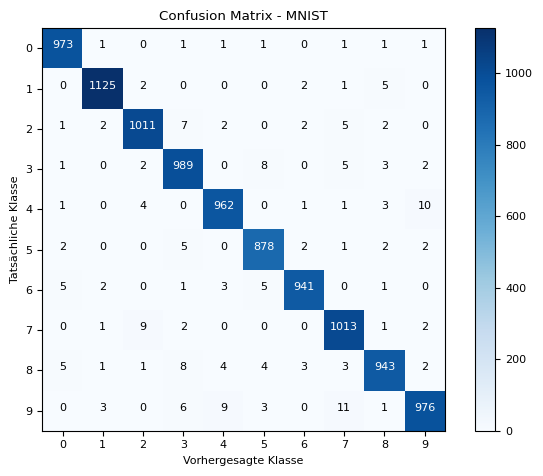

In [25]:
from sklearn.metrics import confusion_matrix

# Erstellen der Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Definiere die Klassenlabels
labels = np.arange(10)

# Plot der Confusion Matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - MNIST')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Tatsächliche Klasse')

# Füge die Werte in die Matrix ein
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

Was wir dieser Grafik entnehmen können... Auf der y-Achse ist die korrekte Ziffer aufgetragen, auf der x-Achse die prädizierte. Stimmen diese Werte überein, wird der Zähler herauf gezählt (auf der Diagonalen). Je höher die Werte auf der Diagonalen, desto besser, weil das Model mehr korrekt prädiziert hat.

Die Felder rund herum geben an, wie häufig das Netz z.B. eine $2$ für eine $5$ gehalten hat, was hier $1$ vorgekommen ist. Besonders hoch, im Vergleich mit den anderen falsch prädizierten Ziffern, scheinen die $10$ falschen Vorhersagen für die $4$ zu sein, welche durch das Neuronale Netz für eine $9$ gehalten wurde. Das schein für mich plausibel, sehen sich diese Ziffern - zumindest wenn ich sie schreibe - häufig sehr ähnlich.

Auf diese Weise kann man ein Stück weit plausibilisieren, was das Neuronale Netz prädiziert.

Ich habe also nun gezeigt, wie man das Neuronale Netz programmiert. Was aber während des Trainings passiert, ist der eigentliche spannende Teil. Kommen wir also nun zum Training.


---

### **Trainieren des Neuronalen Netzes**

Das neuronale Netzwerk lernt, indem es seine Gewichte und Bias-Werte anpasst, um die Vorhersagen zu verbessern. Und das wiederholt immer und immer wieder, bis die Genauigkeit ausreicht oder man das Training abbrechen muss, weil das Modell evtl. nicht komplex genug ist. Das Trainieren eines Neuronalen Netzes folgt traditioneller Weise den folgenden Schritten.

1. **Initialisierung**: Die Gewichte und Bias-Werte des Netzes werden zufällig initialisiert, oft mit einer kleinen Normalverteilung, um eine effizientere Konvergenz zu fördern.
2. **Vorwärtspropagation**: Die Eingabedaten werden durch das Netzwerk geleitet, wobei die Aktivierungsfunktionen und Gewichte verwendet werden, um die Ausgabe des Netzes zu berechnen. Jede Schicht des Netzes führt eine lineare Transformation der Eingaben durch und wendet dann eine nichtlineare Aktivierungsfunktion wie die Sigmoid-, ReLU- oder tanh-Funktion an.
3. **Fehlerberechnung**: Der Unterschied zwischen der berechneten Ausgabe des Netzes und den tatsächlichen Ausgabewerten wird mit einer Fehler- oder Kostenfunktion wie dem Mean Squared Error (MSE) für Regressionen oder dem Crossentropy Error für Klassifizierungen berechnet. Diese Funktion misst die Leistung des Netzes und dient als Grundlage für die Anpassung der Gewichte.
4. **Backpropagation**: Der Fehler wird durch das Netzwerk zurückpropagiert, um den Gradienten der Fehlerfunktion bezüglich der Gewichte und Bias-Werte zu berechnen. Dies wird mit der Kettenregel der Ableitung erreicht, indem der Fehler von der Ausgabeschicht bis zur Eingabeschicht zurückverfolgt wird. Der Gradient gibt an, wie stark sich die Gewichte und Bias-Werte ändern müssen, um den Fehler zu reduzieren.
5. **Gewichtsaktualisierung**: Ein Optimierer, wie der Gradientenabstieg oder seine Varianten wie SGD, Adam oder RMSprop, wird verwendet, um die Gewichte und Bias-Werte basierend auf dem berechneten Gradienten zu aktualisieren. Die Lernrate, die die Größe der Aktualisierungsschritte bestimmt, kann angepasst werden, um die Konvergenz zu steuern und Überanpassung zu vermeiden.
6. **Wiederholung**: Die Schritte 2-5 werden für eine bestimmte Anzahl von Epochen oder bis ein Abbruchkriterium erfüllt ist, wiederholt. Typische Abbruchkriterien umfassen das Erreichen eines bestimmten Genauigkeitsniveaus auf einem Validierungsdatensatz oder das Ausbleiben einer signifikanten Verbesserung der Leistung über mehrere Epochen hinweg.

<figure>
    <img src="https://d1rwhvwstyk9gu.cloudfront.net/2018/11/Capture2-3.png", width="400">
    <figcaption>Das Zusammenspiel von Backpropagation, Gradientenabstieg und Optimierer soll das globale Miminum der Kostenfunktion finden. <a href="https://brilliant.org/wiki/backpropagation/">Bildquelle</a>
  </figure>

Im folgenden gehe ich zunächst auf ein paar der Kostenfunktionen ein. Dann beschreibe ich Vorwärts- und Rückwärtspropagation sowie dem Gradientenabstiegsverfahren ausführlicher.
Zuletzt versuche ich mich an einem (Zahlen-)Beispiel.
In einem anderen, folgenden Beitrag soll es dann um die Optimierer gehen.

#### **Vorwärtspropagation**

Vorwärtspropagation ist der Prozess, bei dem Eingabedaten durch das neuronale Netzwerk fließen, um eine Vorhersage zu generieren. In jeder Schicht werden die Eingaben mit den Gewichten multipliziert und die Biasse addiert. Die resultierende Summe wird dann durch eine Aktivierungsfunktion wie die Sigmoid-Funktion oder die ReLU-Funktion geleitet, um die Aktivierungen der Neuronen zu berechnen. Dieser Prozess wird für jede Schicht wiederholt, bis die Ausgabe erreicht wird. Mathematisch ausgedrückt:

\begin{align*}
z^{(l)} &= W^{(l)} \cdot a^{(l-1)} + b^{(l)} \\
a^{(l)} &= f(z^{(l)})
\end{align*}

Hier ist $z^{(l)}$ die gewichtete Summe der Eingaben in Schicht $l$, $W^{(l)}$ sind die Gewichte, $a^{(l-1)}$ sind die Aktivierungen der vorherigen Schicht, $b^{(l)}$ sind die Biasse und $f()$ ist die Aktivierungsfunktion.

##### **Fehlerberechnung: Kostenfunktionen**

In diesem Abschnitt möchte ein paar der gängigsten Kostenfunktionen nennen.

* **Mean Squared Error (MSE)**: Die MSE-Funktion misst den durchschnittlichen quadratischen Fehler zwischen den tatsächlichen und erwarteten Ausgaben. Sie wird häufig bei Regressionsproblemen verwendet, bei denen das Ziel darin besteht, eine kontinuierliche Ausgabe zu schätzen. Die Funktion berechnet den quadratischen Unterschied zwischen jeder tatsächlichen und erwarteten Ausgabe und nimmt dann den Durchschnitt über alle Beispiele. Die MSE-Funktion ist empfindlich gegenüber Ausreißern, da der quadratische Fehler stark ansteigt, wenn der Unterschied zwischen den tatsächlichen und erwarteten Werten größer wird.

\begin{equation}
\nonumber
  MSE = \dfrac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\end{equation}

* **Mean Absolute Error (MAE)**: Die MAE-Funktion misst den durchschnittlichen absoluten Fehler zwischen den tatsächlichen und erwarteten Ausgaben. Im Gegensatz zur MSE-Funktion, die den quadratischen Fehler berücksichtigt, betrachtet MAE den absoluten Fehler. Dies bedeutet, dass Ausreißer in den Daten weniger Einfluss auf die Kosten haben als bei der Verwendung von MSE. Die MAE-Funktion ist ebenfalls bei Regressionsproblemen nützlich und wird oft verwendet, wenn es wichtig ist, den durchschnittlichen Fehler in den tatsächlichen Einheiten der Ausgabe zu verstehen.

\begin{equation}
\nonumber
  MAE = \dfrac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
\end{equation}

* **Binary Cross-Entropy**: Diese Funktion wird verwendet, wenn es sich um ein binäres Klassifikationsproblem handelt, bei dem die Ausgabe entweder 0 oder 1 ist. Die Funktion misst den Fehler zwischen den tatsächlichen und erwarteten Ausgaben, wobei die Ausgaben als Wahrscheinlichkeiten interpretiert werden. Sie verwendet die logarithmische Funktion, um den Fehler zu berechnen, wobei ein höherer Fehler auftritt, wenn die tatsächliche Ausgabe stark von der erwarteten Ausgabe abweicht. Die Binary Cross-Entropy-Funktion wird oft mit der Sigmoid-Aktivierungsfunktion in der Ausgabeschicht kombiniert.

\begin{equation}
\nonumber
  Binary Cross Entropy = -\dfrac{1}{n} \sum_{i=1}^{n} [y_i \log(\hat{y}_i) + (1-y_i) \log(1-\hat{y}_i)]
\end{equation}

* **Categorical Cross-Entropy**: Diese Funktion wird verwendet, wenn es sich um ein mehrklassiges Klassifikationsproblem handelt, bei dem die Ausgabe in mehrere Klassen unterteilt ist. Ähnlich wie bei der binären Cross-Entropy-Funktion misst sie den Fehler zwischen den tatsächlichen und erwarteten Ausgaben, wobei die Ausgaben als Wahrscheinlichkeiten interpretiert werden. Die Categorical Cross-Entropy-Funktion verwendet die logarithmische Funktion, um den Fehler zu berechnen, wobei ein höherer Fehler auftritt, wenn die tatsächliche Ausgabe stark von der erwarteten Ausgabe abweicht. Sie wird oft mit der Softmax-Aktivierungsfunktion in der Ausgabeschicht kombiniert, um die Wahrscheinlichkeiten für jede Klasse zu normalisieren.

\begin{equation}
\nonumber
  Categorical Cross Entropy = -\dfrac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{m} y_{ij} \log(\hat{y}_{ij})
\end{equation}

In den Gleichungen stehen $y$ und $\hat{y}_i$ für die tatsächlichen (ground truth) und die vorhergesagten Werte bzw. Ausgaben des Modells.

  * In den Kontexten von Regression (wie beim MSE und MAE) repräsentiert $y$ den tatsächlichen Wert der Zielgröße (z. B. echte Preise bei einem Preisschätzungsmodell) und $\hat{y}_i$​ repräsentiert die vom Modell vorhergesagten Werte.
  * Im binären Kreuzentropie-Verlust (Binary Cross Entropy) repräsentiert $y$ die tatsächliche Klasse (entweder $0$ oder $1$) und $\hat{y}_i$​ repräsentiert die Wahrscheinlichkeit, dass das Modell diese Klasse vorhersagt.
  * Im kategorialen Kreuzentropie-Verlust (Categorical Cross Entropy) repräsentiert $y_{ij}$​ die Wahrscheinlichkeit, dass das Modell das Beispiel $i$ als Klasse $j$  vorhersagt, während $y_{ij}$​ die tatsächliche Wahrscheinlichkeit ist, dass Beispiel $i$ Klasse $j$ ist.

In allen Fällen ist $y$ der ground truth-Wert und $\hat{y}_i$​ ist die Modellvorhersage.


##### **Backpropagation**

Backward Propagation ist der Prozess, bei dem der Fehler durch das Netzwerk zurückgeleitet wird, um den Gradienten der Fehlerfunktion bezüglich der Gewichte und Biasse zu berechnen. Der Gradient wird mittels der Kettenregel der Ableitung berechnet und von der Ausgabeschicht zur Eingabeschicht propagiert. Mathematisch ausgedrückt:

\begin{align*}
\delta^{(L)} &= \nabla_a E \odot f'(z^{(L)}) \\
\delta^{(l)} &= ((W^{(l+1)})^T \cdot \delta^{(l+1)}) \odot f'(z^{(l)})
\end{align*}

Hierbei ist $\delta^{(L)}$ der Fehler in Schicht $l$, $\nabla_a E$ der Gradient der Fehlerfunktion bezüglich der Ausgaben, $f'(\cdot)$ ist die Ableitung der Aktivierungsfunktion, $z^{(L)}$ ist die gewichtete Summe der Eingaben in Schicht $l$ und $\odot$ steht für die elementweise Multiplikation.

#### **Gewichtsaktualisierung**

Die Gewichtsaktualisierung ist ein entscheidender Schritt im Training neuronaler Netze. Nachdem der Gradient der Fehlerfunktion bezüglich der Gewichte und Biasse berechnet wurde, werden die Gewichte und Biasse basierend auf diesem Gradienten und einer Lernrate $\alpha$ aktualisiert. Dies geschieht, um den Fehler schrittweise zu minimieren und das Modell anzupassen. Die Gewichtsaktualisierung erfolgt durch die Anwendung des Gradientenabstiegsverfahrens:

1. Die Änderung der Gewichte $\Delta W^{(l)}$ und Biasse $\Delta b^{(l)}$ wird durch Multiplikation des negativen Gradienten mit der Lernrate berechnet.
2. Die Gewichte und Biasse werden entsprechend der berechneten Änderung aktualisiert.
3. Dieser Prozess wird iterativ wiederholt, um den Fehler über mehrere Epochen hinweg zu minimieren und das Modell zu verbessern.

Die Lernrate beeinflusst die Größe der Aktualisierungsschritte und ist entscheidend für die Konvergenz des Modells. Eine zu hohe Lernrate kann zu instabilen oder divergenten Lösungen führen, während eine zu niedrige Lernrate zu langsamer Konvergenz oder lokalen Minima führen kann. Daher ist die Auswahl einer geeigneten Lernrate von entscheidender Bedeutung für das Training eines neuronalen Netzwerks.


In einem separaten Beitrag werde ich an einem Beispiel zeigen, wie hier das Zusammenspiel funktioniert.

### **Zusammenfassung**

<figure>
  <img src="https://poissonisfish.files.wordpress.com/2020/11/non-convex-optimization-we-utilize-stochastic-gradient-descent-to-find-a-local-optimum.jpg?w=475&h=316">
  <figcaption>Gradientenabstiegsverfahren im 3-dimensionalen Raum. <a href="https://poissonisfish.com/2023/04/11/gradient-descent/">Bildquelle</a>
</figure>

Das Ziel des oben beschriebenen Verfahrens, das Backpropagation, Mean Squared Error (MSE) und Stochastic Gradient Descent (SGD) kombiniert, ist es, ein neuronales Netzwerk zu trainieren, um ein globales Minimum der Kostenfunktion in einem hochdimensionalen Raum zu finden. Durch die schrittweise Anpassung der Gewichte und Bias-Werte mit Hilfe des Gradientenabstiegsverfahrens wird die Kostenfunktion kontinuierlich minimiert, um eine optimale Leistung des Netzwerks in Bezug auf die gegebene Aufgabe zu erreichen. Dieser Prozess ermöglicht es dem Netzwerk, komplexe Muster und Zusammenhänge in den Daten zu lernen und präzise Vorhersagen zu treffen.

---

## Aktivierungsfunktionen

Auch Aktivierungsfunktionen sind ein wichtiger Bestandteil eines jeden künstlichen neuronalen Netzes. Sie bestimmen, wie das Netzwerk auf bestimmte Eingaben reagiert und tragen maßgeblich zur Leistung und Genauigkeit eines ANNs bei. In diesem Abschnitt werden wir ein paar der am häufigsten in ANNs verwendeten Aktivierungsfunktionen kennenlernen.

### **Sigmoid-Funktion**

Die **Sigmoid-Funktion** wird oft in binären Klassifikationsproblemen verwendet. Die Funktion verwendet eine S-förmige Kurve, die eine glatte Überlappung zwischen den Klassen ermöglicht. Sie liefert einen Ausgangswert zwischen 0 und 1. Ein Nachteil der Sigmoid-Funktion ist, dass sie anfällig für das Problem des verschwindenden Gradienten (Gradient Vanishing) ist, wenn die Gewichtungen zu groß werden.

* **Sigmoid Gradient Vanishing** beschreibt das Phänomen, dass einzelne Gradienten gegen null gehen. Das liegt daran, dass die Ableitung der Sigmoid-Funktion bei sehr großen oder sehr kleinen Eingaben sehr klein wird. Wenn der Gradient nahe null liegt, kann es zu sehr langsamen oder gestoppten Training des ANNs kommen, weil der Gradient benötigt wird, um die Parameter des ANNs zu aktualisieren. Lösungen können zum Beispiel andere Aktivierungsfunktionen, die ReLU oder die Verwendung von Methoden wie Gradient Clipping oder Batch Normalization sein.

Ein häufiger Use-Case für Sigmoid-Aktivierungsfunktionen findet sich bei binären Klassifikationsproblemen, bei denen das Modell Vorhersagen treffen muss, die entweder „wahr“ oder „falsch“ sind (Ist auf dem Bild ein Hund zu sehen?).

Die Formel für die Sigmoid-Aktivierungsfunktion lautet:

\begin{equation}
\nonumber
  f(x) = \dfrac{1}{1 + e^{-x}}
  \end{equation}

Aktivierungsfunktion und Ableitung sind hier dargestellt.

<figure>
    <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*7XQVdpnz_QctgMkY1wivJg.png", width="500">
    <figcaption>Sigmoid-Aktivierungsfunktion mit Ableitung, Bild vom Autor
  </figure>

### **Rectified Linear Unit (ReLU)**

Bei der **ReLU-Funktion (Rectified Linear Unit)** handelt es sich um eine lineare Funktion, die Null für negative Eingaben und den eingegebenen Wert selbst für positive Eingaben liefert. Daher ist die ReLU-Funktion besonders nützlich, wenn es darum geht, nicht-lineare Funktionen zu lernen. Ein Nachteil der ReLU-Funktion ist jedoch, dass sie anfällig für den Toten Neuronen-Effekt ist, bei dem Neuronen, die einen negativen Ausgang liefern, auf null gesetzt werden und nicht mehr trainiert werden können.

* Das **Dying ReLU** Problem beschreibt den Effekt, wenn ein Neuron im ANN wegen der verwendeten Aktivierungsfunktion keine Aktivierung mehr ausgibt und für alle folgenden Schichten des neuronalen Netzes inaktiv bleibt. Diese Einschränkung kann dazu führen, dass das ANN nicht mehr ordnungsgemäß funktioniert und die Leistung beeinträchtigt wird. Lösungen für dieses Problem können zum Beispiel die Leaky oder Parametric ReLU Aktivierungsfunktion sein. Diese sorgen dafür, dass das Neuron bei negativen Eingaben eine kleine Aktivierung ausgibt. Alternativ kann man das ANN so initialisieren, dass die Gewichte nicht zu stark negativ werden.

Die ReLU-Aktivierungsfunktion ist eine gängige Wahl für Probleme des Deep Learning, bei denen es darum geht, Funktionen zu approximieren, die nicht lineare Beziehungen aufweisen. Ein Beispiel könnte die Vorhersage des Verkaufspreises eines Hauses basierend auf verschiedenen Merkmalen wie Größe, Lage und Alter sein.

Die Formel für die ReLU-Aktivierungsfunktion lautet:

\begin{equation}
\nonumber
  f(x) = max(0, x)
\end{equation}

Die ReLU-Funktion ihrerseits und ihre Ableitung lässt sich grafisch so darstellen:
  
<figure>
    <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*UJha_STDlixfPVGZ2EGEVA.png", width="500">
    <figcaption>ReLU-Aktivierungsfunktion mit Ableitung</figcaption>
  </figure>
  


### **Tanh (Hyperbolic Tangent)**

Die Tanh-Funktion beschreibt eine der Sigmoid-Funktion ähnliche S-förmige Kurve. Sie liefert jedoch Ausgabewerte zwischen -1 und 1, was sie für Probleme geeigneter macht, bei denen negative Ausgaben möglich sind. Ein Nachteil der Tanh-Funktion ist jedoch, dass sie ebenfalls anfällig für das Problem des verschwindenden Gradienten ist.

Ein gängiger Use-Case für die Tangens hyperbolicus-Aktivierungsfunktion ist bei Problemen des Tiefenlernens, bei denen es darum geht, komplexere Funktionen als die ReLU-Funktion zu approximieren. Ein Beispiel könnte die Vorhersage der Bewegung eines Objekts basierend auf seiner Geschwindigkeit und Beschleunigung sein.

Die Formel für die Tangens hyperbolicus-Aktivierungsfunktion lautet:

\begin{equation}
\nonumber
  f(x) = tanh(x) 
\end{equation}

Die Tanges hyperbolicus-Funktion und ihre Ableitung in einer Grafik:

<figure>
    <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*c4Z6iIz0qWXgLqeQ1c1bWw.png", width="500">
    <figcaption>Tanh-Aktivierungsfunktion mit Ableitung</figcaption>
  </figure>

Tanh-Aktivierungsfunktion mit Ableitung, Bild vom Autor
Es gibt noch weitere Aktivierungsfunktionen, die in künstlichen neuronalen Netzen verwendet werden, aber die oben genannten sind einige der häufigsten. Die Wahl der richtigen Aktivierungsfunktion hängt von der Art des Problems und den Anforderungen an das Modell ab. Es ist wichtig, dass man sich Zeit nimmt, um die verschiedenen Aktivierungsfunktionen zu verstehen und zu vergleichen, um die bestmögliche Leistung für Ihr Problem zu erzielen.

---

## **Optimierer**

In diesem Abschnitt möchte ich kurz ein paar der üblichen Optimierer beschreiben: Stochastic Gradient Descent (SGD), Adam (Adaptive Moment Estimation) und RMSProp (Root Mean Squared Propagation). In einem separaten Beitrag plane ich genauer auf ein paar Optimierer einzugehen.

### **Stochastic Gradient Descent (SGD):**

SGD ist einer der grundlegendsten Optimierer für das Training neuronaler Netze. Es basiert auf dem Gradientenabstiegsverfahren, bei dem die Gewichte nach jedem Mini-Batch der Trainingsdaten aktualisiert werden, um den Fehler zu minimieren. Die Gewichtsaktualisierung erfolgt entlang der Richtung des negativen Gradienten der Fehlerfunktion, wodurch das Modell Schritt für Schritt verbessert wird.

\begin{equation}
    W^{(t+1)} = W^{(t)} - \alpha \cdot \nabla E(W^{(t)})
\end{equation}

mit $\alpha$ der Lernrate und $\nabla E(W^{(t)})$ dem Gradienten der Fehlerfunktion $E$ bezüglich der Gewichte $W$.

### **Adam (Adaptive Moment Estimation)**

Adam ist ein beliebter Optimierer, der die Vorteile von AdaGrad und RMSProp kombiniert. Es verwendet sowohl einen adaptiven Lernratenansatz als auch eine Momentenschätzung, um die Gewichte während des Trainings anzupassen. Adam passt die Lernrate für jedes Gewicht basierend auf vergangenen Gradienten und Quadraten der Gradienten an, wodurch er effektiv und robust ist und häufig in der Praxis verwendet wird.

\begin{align*}
    m^{(t+1)} = \beta_1 \cdot m^{(t)} + (1 - \beta_1) \cdot \nabla E(W^{(t)}) \\
    v^{(t+1)} = \beta_2 \cdot v^{(t)} + (1 - \beta_2) \cdot (\nabla E(W^{(t)}))^2 \\
    W^{(t+1)} = W^{(t)} - \dfrac{\alpha}{\sqrt{v^{(t+1)}+\Epsilon}} \cdot m^{(t+2)}
\end{align*}

mit $m^{(t)}$ und $v^{(t)}$ den gleitenden Mittelwerten des Gradienten und seiner Quadrate, $\beta_1$ und $\beta_2$ den Exponentialfaktoren, $\alpha$ der Lernrate und $\Epsilon$ einem Wert zum stabilisieren.

### **RMSProp (Root Mean Square Propagation)**

RMSProp ist eine Variante des Gradientenabstiegsverfahrens, bei der die Lernrate für jedes Gewicht basierend auf dem durchschnittlichen quadratischen Gradienten für dieses Gewicht angepasst wird. Dies ermöglicht eine individuelle Anpassung der Lernrate für jedes Gewicht, was insbesondere bei ungleichmäßig verteilten Gradienten hilfreich ist. RMSProp hilft, die Konvergenzgeschwindigkeit zu verbessern und lokale Minima zu vermeiden.

\begin{align*}
    v^{(t+1)} = \beta \cdot v^{(t)} + (1 - \beta) \cdot (\nabla E (W^{(t)}))^2 \\
    W^{(t+1)} = W^{(t)} - \dfrac{\alpha}{\sqrt{v^{(t+1)}}+\Epsilon} \cdot \nabla E (W^{(t)})
\end{align*}

mit $v^{(t)}$ dem gleitenden Mittelwert des quadratischen Gradienten, $\beta$ einem Exponentialfaktor, $\alpha$ der Lernrat und $\Epsilon$ einem Wert zum stabilisieren.

---

## **Arten neuronaler Netze**

Neuronale Netze können je nach Architektur und Funktionsweise in verschiedene Arten unterteilt werden. Jede Art hat ihre eigenen Stärken und Schwächen und ist für bestimmte Anwendungen optimiert. In diesem Abschnitt schauen wir uns ein paar der gängigsten Arten an.

### **Feedforward-Netzwerke**

Feedforward-Netzwerke sind die einfachste Art von neuronalen Netzen und bestehen aus einer Eingangsschicht, einer oder mehreren verborgenen Schichten und einer Ausgangsschicht. Die Daten fließen in einer Richtung durch das Netzwerk, von der Eingangsschicht zur Ausgangsschicht. Feedforward-Netzwerke werden häufig für Klassifizierungsaufgaben eingesetzt, wie zum Beispiel die Erkennung von handgeschriebenen Ziffern.

<figure>
  <img src="https://tikz.net/wp-content/uploads/2021/12/neural_networks-006.png", width="700">
  <figcaption>Ein tiefes Feedforward Neuronal Network. <a href="https://tikz.net/neural_networks/">Bildquelle</a>
</figure>

### **Convolutional Neural Networks (CNN)**

CNNs sind auf die Verarbeitung von Bildern spezialisiert und werden häufig für Bilderkennungsaufgaben eingesetzt. Sie bestehen aus mehreren Schichten, darunter Convolutional-Schichten, Pooling-Schichten und vollständig verbundene Schichten. Die Convolutional-Schichten wenden Filter auf die Eingangsbilder an und extrahieren Merkmale. Die Pooling-Schichten reduzieren die Größe der Merkmalskarten bzw. engl. feature maps. Vollständig verbundene Schichten klassifizieren dann die extrahierten Merkmale.

<figure>
  <img src="https://tikz.net/wp-content/uploads/2021/12/neural_networks-007.png", width="500">
  <figcaption>Ein tiefes Convolutional Neural Network mit verschiedenen Layern.<a href="https://tikz.net/neural_networks/">Bildquelle</a>
</figure>

### **Recurrent Neural Networks (RNN)**

RNNs sind auf die Verarbeitung von Sequenzen spezialisiert, wie zum Beispiel Sprache und Zeitreihen. Sie haben eine interne Gedächtnisfunktion, die es ihnen ermöglicht, Informationen aus früheren Schritten zu speichern und in zukünftigen Schritten zu verwenden. RNNs bestehen aus einer oder mehreren Schichten, die mit wiederkehrenden Neuronen verbunden sind.

<figure>
  <img src="https://camo.githubusercontent.com/019182ee8a8510dbfc903cfe81fe783541bd4e123cf798365daf41dc0d4021bb/68747470733a2f2f6769746875622e636f6d2f446565704c6561726e696e674454552f30323435362d646565702d6c6561726e696e672d776974682d5079546f7263682f626c6f622f6d61737465722f7374617469635f66696c65732f726e6e2d756e666f6c642e706e673f7261773d31", width="500">
  <figcaption>Gradientenabstiegsverfahren im 3-dimensionalen Raum. <a href="https://github.com/CaptainE/RNN-LSTM-in-numpy/blob/master/RNN_LSTM_from_scratch.ipynb">Bildquelle</a>
</figure>

### **Long Short-Term Memory (LSTM) Networks**

LSTMs sind eine Art von RNNs, die besonders gut für die Verarbeitung von langen Sequenzen geeignet sind. Sie haben eine komplexe Architektur, die es ihnen ermöglicht, Informationen auf lange Sicht zu speichern und zu vergessen. LSTM-Netzwerke werden häufig in der Spracherkennung, Textverarbeitung und Übersetzung eingesetzt.

<figure>
  <img src="https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Mr9zEA72R-LdAHtnXyZ0Eg.png", width="500">
  <figcaption>Gradientenabstiegsverfahren im 3-dimensionalen Raum. <a href="https://medium.com/ai%C2%B3-theory-practice-business/awd-lstm-6b2744e809c5">Bildquelle</a>
</figure>

### **Physical Guided Neural Network (PGNNs)**

Ein weiteres interessantes Konzept ist das PGNN, auch bekannt als Physical Informed Neural Network (PINN). PGNNs nutzen physikalische Gesetze und mathematische Modelle, um das Verhalten eines Systems vorherzusagen. Sie werden häufig in der numerischen Simulation und der Prozessoptimierung eingesetzt, um den Entwurfsprozess zu beschleunigen und zu optimieren. PGNNs erfordern weniger Trainingsdaten als herkömmliche maschinelle Lernmodelle und können die Kosten und die Zeit für die Durchführung von Experimenten erheblich reduzieren. Sie werden in der Strömungsdynamik, der Materialwissenschaft und der Ingenieurwissenschaft eingesetzt, um Prozesse wie Strömung, Wärmeübertragung und mechanische Belastung zu simulieren und zu optimieren.

<figure>
  <img src="https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Hf1WUZdGN5ol_np475U72w.png", width="500">
  <figcaption>Gradientenabstiegsverfahren im 3-dimensionalen Raum. <a href="https://en.wikipedia.org/wiki/Physics-informed_neural_networks">Bildquelle</a>
</figure>

### **Autoencoder-Layer**

Autoencoder sind ein spezieller Typ von neuronalen Netzen, bei denen das Ziel darin besteht, die Eingabedaten so genau wie möglich zu rekonstruieren. Sie bestehen aus einem Encoder-Teil, der die Eingabedaten in einen komprimierten latenten Raum abbildet, und einem Decoder-Teil, der die Daten aus diesem Raum in das ursprüngliche Eingabeformat zurück transformiert.

<figure>
  <img src="https://tikz.net/wp-content/uploads/2021/12/neural_networks-008.png", width="550">
  <figcaption>Ein Autoencoder Netzwerk (Encoder + Decoder).<a href="https://tikz.net/neural_networks/">Bildquelle</a>
</figure>

Je nach Anwendungsfall können verschiedene Arten von Netzen verwendet werden, um das bestmögliche Ergebnis zu erzielen.

## **Zusammenfassung**

In diesem Beitrag habe ich dir hoffentlich etwas über Neuronale Netze beibringen können: Was ist das **Hallo Welt!** des maschinellen Lernens? Wie sieht dieser sogenannte **MNIST**-Datensatz im Detail aus? Was ist ein Confusion Matrix und wie lernen neuronale Netze? Was sind Kostenfunktionen, Backpropagation, Optimierer usw. usf.
Ich habe auch ein paar der Aktivierungsfunktionen und Optimierer beschrieben. Auch ein paar Arten Neuronaler Netze habe ich gezeigt.

Wenn du Fragen oder Fehler gefunden hast, dann melde dich doch gerne bei mir (oder hier in den Kommentaren, sollte ich die Funktion bis dahin eingbaut haben.).

In noch kommenden Beiträgen, möchte ich einzelne Themen wie z.B. Optmierer noch genauer beschreiben.